In [1]:
%matplotlib inline

#import ROOT
#from ROOT import TCanvas, TH1F, TLegend
#from NNDefs import build_and_train_class_nn
from LayersDefs import get_signal_and_background_frames, calculate_derived_et_columns, roc_cuts, background_eff_at_target_signal_eff, manual_train_1d, min_manual_eff_1d
#from sklearn.model_selection import train_test_split
import math
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from tqdm import tqdm

Welcome to JupyROOT 6.18/00


In [5]:
#signal_frame, background_frame = get_signal_and_background_frames()
signal_frame, background_frame = get_signal_and_background_frames('/eos/user/n/nicholas/SWAN_projects/NewTauSamples/dataFiles/ztt_LayerEts.root', '/eos/user/n/nicholas/SWAN_projects/NewTauSamples/dataFiles/MB80_LayerEts.root')

all_frame = pd.concat([signal_frame, background_frame], sort=True)

In [18]:
calculate_derived_et_columns(signal_frame, background_frame)

calculate_derived_et_columns(signal_frame, background_frame, layer_weights=[1, 1, 1, 1], column_names=['L0Et', 'L1Et', 'L2Et', 'L3Et'],
                                     output_column_name='EMEt')

calculate_derived_et_columns(signal_frame, background_frame, layer_weights=[1, 1], column_names=['L0Et', 'L1Et'],
                             output_column_name='L0+L1Et')

calculate_derived_et_columns(signal_frame, background_frame, layer_weights=[1, 1], column_names=['L2Et', 'L3Et'],
                             output_column_name='L2+L3Et')

# Calculate 3 layer with minimum weights
#calculate_derived_et_columns(signal_frame, background_frame, layer_weights=[1, 1.3, 8.4], column_names=['L0+L1Et', 'L2+L3Et', 'HadEt'],
#                             output_column_name='3LayerWeightedEt')

In [21]:
calculate_derived_et_columns(old_signal_frame, old_background_frame)

calculate_derived_et_columns(old_signal_frame, old_background_frame, layer_weights=[1, 1, 1, 1], column_names=['L0Et', 'L1Et', 'L2Et', 'L3Et'],
                                     output_column_name='EMEt')

calculate_derived_et_columns(old_signal_frame, old_background_frame, layer_weights=[1, 1], column_names=['L0Et', 'L1Et'],
                             output_column_name='L0+L1Et')

calculate_derived_et_columns(old_signal_frame, old_background_frame, layer_weights=[1, 1], column_names=['L2Et', 'L3Et'],
                             output_column_name='L2+L3Et')

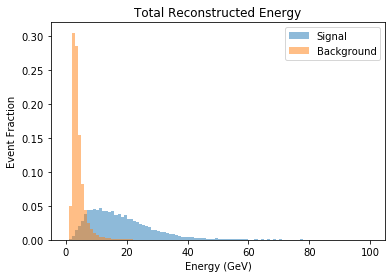

In [7]:
plt.hist(signal_frame[['TotalEt']].values, 100, alpha=0.5, density=True, range=[0, 100], label='Signal')
plt.hist(background_frame[['TotalEt']].values, 100, alpha=0.5, density=True, range=[0, 100], label='Background')
plt.title('Total Reconstructed Energy')
plt.xlabel('Energy (GeV)')
plt.ylabel('Event Fraction')
plt.legend(loc='upper right')
plt.show()
#plt.savefig('../plots/trainingUpdate/RecoEt.pdf')

In [28]:
print(len(signal_frame[signal_frame['TotalEt'] > 6.8]) / len(signal_frame))
print(len(background_frame[background_frame['TotalEt'] > 6.8]) / len(background_frame))

0.9015326135306725
0.08654913450865491


In [9]:
signal_em_values = signal_frame['EMEt'].values
signal_had_values = signal_frame['HadEt'].values

background_em_values = background_frame['EMEt'].values
background_had_values = background_frame['HadEt'].values

sig_hist, sig_xedges, sig_yedges = np.histogram2d(signal_em_values, signal_had_values, bins=20, range=[[0, 20], [0, 20]], density=True)
back_hist, back_xedges, back_yedges = np.histogram2d(background_em_values, background_had_values, bins=20, range=[[0, 20], [0, 20]], density=True)

x_pos, y_pos = np.meshgrid(sig_xedges[:-1], sig_yedges[:-1])
x_pos = x_pos.ravel()
y_pos = y_pos.ravel()
z_pos = 0

dx = dy = 0.5
sig_dz = sig_hist.ravel()
back_dz = back_hist.ravel()

print(len(x_pos))
#print(len(dz))

400


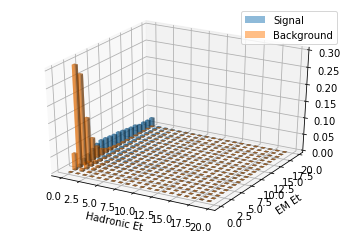

In [10]:
}{}

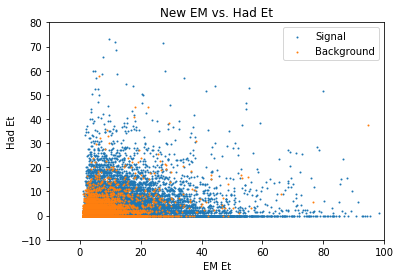

In [19]:
plt.scatter(signal_frame[['EMEt']].values, signal_frame[['HadEt']].values, s=1, label='Signal')
plt.scatter(background_frame[['EMEt']].values, background_frame[['HadEt']].values, s=1, label='Background')
plt.xlim(-10, 100)
plt.ylim(-10, 80)
plt.title('New EM vs. Had Et')
plt.xlabel('EM Et')
plt.ylabel('Had Et')
plt.legend(loc='upper right')
plt.show()
#plt.savefig('../plots/trainingUpdate/temp/EMvsHadBoth.pdf')

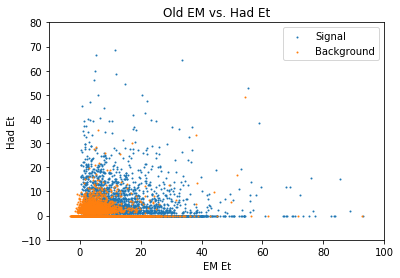

In [22]:
plt.scatter(old_signal_frame[['EMEt']].values, old_signal_frame[['HadEt']].values, s=1, label='Signal')
plt.scatter(old_background_frame[['EMEt']].values, old_background_frame[['HadEt']].values, s=1, label='Background')
plt.xlim(-10, 100)
plt.ylim(-10, 80)
plt.title('Old EM vs. Had Et')
plt.xlabel('EM Et')
plt.ylabel('Had Et')
plt.legend(loc='upper right')
plt.show()

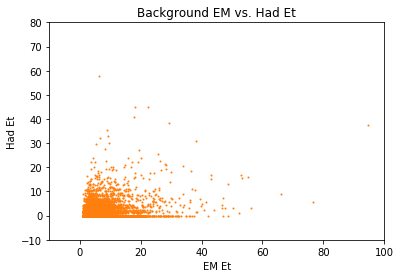

In [58]:
plt.clf()
plt.scatter(signal_frame[['EMEt']].values, signal_frame[['HadEt']].values, s=1, label='Signal')
plt.xlim(-10, 100)
plt.ylim(-10, 80)
plt.title('Signal EM vs. Had Et')
plt.xlabel('EM Et')
plt.ylabel('Had Et')
#plt.show()
plt.savefig('../plots/trainingUpdate/temp/EMvsHadSignal.pdf')

plt.clf()
plt.scatter(background_frame[['EMEt']].values, background_frame[['HadEt']].values, s=1, label='Background', c='C1')
plt.xlim(-10, 100)
plt.ylim(-10, 80)
plt.title('Background EM vs. Had Et')
plt.xlabel('EM Et')
plt.ylabel('Had Et')
#plt.show()
plt.savefig('../plots/trainingUpdate/temp/EMvsHadBackground.pdf')

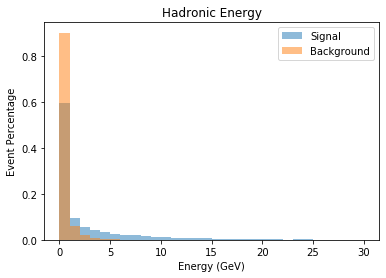

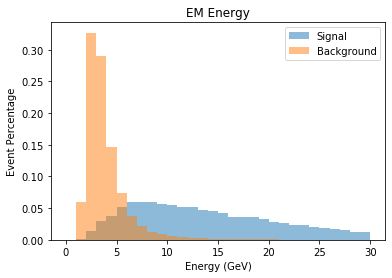

In [34]:
range_val = 30

plt.hist(signal_had_values, range_val, alpha=0.5, density=True, range=[0, range_val], label='Signal')
plt.hist(background_had_values, range_val, alpha=0.5, density=True, range=[0, range_val], label='Background')
plt.title('Hadronic Energy')
plt.xlabel('Energy (GeV)')
plt.ylabel('Event Percentage')
plt.legend(loc='upper right')
plt.show()

plt.hist(signal_em_values, range_val, alpha=0.5, density=True, range=[0, range_val], label='Signal')
plt.hist(background_em_values, range_val, alpha=0.5, density=True, range=[0, range_val], label='Background')
plt.title('EM Energy')
plt.xlabel('Energy (GeV)')
plt.ylabel('Event Percentage')
plt.legend(loc='upper right')
plt.show()

In [7]:
zero_had_signal_criteria = signal_frame['HadEt'] == 0
zero_had_background_criteria = background_frame['HadEt'] == 0

nonzero_had_signal_criteria = [not i for i in zero_had_signal_criteria]
nonzero_had_background_criteria = [not i for i in zero_had_background_criteria]

zero_had_signal = signal_frame.loc[zero_had_signal_criteria].copy()
zero_had_background = background_frame.loc[zero_had_background_criteria].copy()

nonzero_had_signal = signal_frame.loc[nonzero_had_signal_criteria].copy()
nonzero_had_background = background_frame.loc[nonzero_had_background_criteria].copy()

In [8]:
print('Percentage of events with 0 hadronic energy:')
print('Signal: ',len(zero_had_signal)/len(signal_frame))
print('Background: ',len(zero_had_background)/len(background_frame))

print('Percentage of events with non-0 hadronic energy:')
print('Signal: ',len(nonzero_had_signal)/len(signal_frame))
print('Background: ',len(nonzero_had_background)/len(background_frame))

Percentage of events with 0 hadronic energy:
Signal:  0.5348209906817067
Background:  0.9493403235383568
Percentage of events with non-0 hadronic energy:
Signal:  0.46517900931829326
Background:  0.05065967646164318


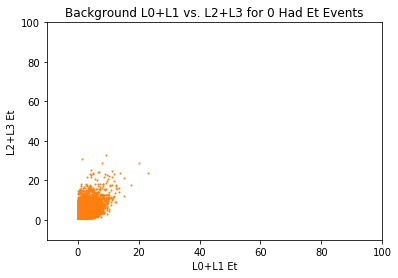

In [46]:
plt.scatter(zero_had_signal[['L0+L1Et']].values, zero_had_signal[['L2+L3Et']].values, s=1, label='Signal')
plt.scatter(zero_had_background[['L0+L1Et']].values, zero_had_background[['L2+L3Et']].values, s=1, label='Background', c='C1')
plt.xlim(-10, 100)
plt.ylim(-10, 100)
plt.title('L0+L1 vs. L2+L3 for 0 Had Et Events')
plt.xlabel('L0+L1 Et')
plt.ylabel('L2+L3 Et')
#plt.show()
plt.savefig('../plots/trainingUpdate/temp/L0L1vsL2L3.pdf')

plt.clf()
plt.scatter(zero_had_signal[['L0+L1Et']].values, zero_had_signal[['L2+L3Et']].values, s=1, label='Signal')
plt.xlim(-10, 100)
plt.ylim(-10, 100)
plt.title('Signal L0+L1 vs. L2+L3 for 0 Had Et Events')
plt.xlabel('L0+L1 Et')
plt.ylabel('L2+L3 Et')
#plt.show()
plt.savefig('../plots/trainingUpdate/temp/L0L1vsL2L3Signal.pdf')

plt.clf()
plt.scatter(zero_had_background[['L0+L1Et']].values, zero_had_background[['L2+L3Et']].values, s=1, label='Background', c='C1')
plt.xlim(-10, 100)
plt.ylim(-10, 100)
plt.title('Background L0+L1 vs. L2+L3 for 0 Had Et Events')
plt.xlabel('L0+L1 Et')
plt.ylabel('L2+L3 Et')
#plt.show()
plt.savefig('../plots/trainingUpdate/temp/L0L1vsL2L3Background.pdf')

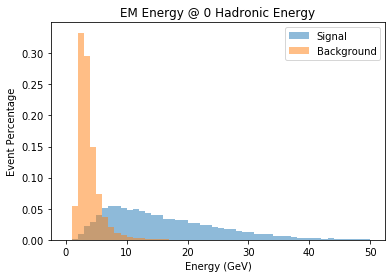

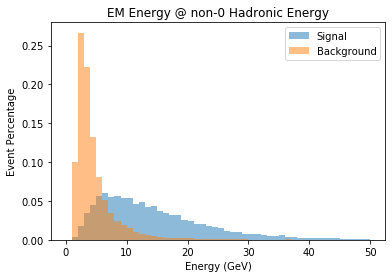

In [14]:
range_val = 50

plt.hist(zero_had_signal['EMEt'].values, range_val, alpha=0.5, density=True, range=[0, range_val], label='Signal')
plt.hist(zero_had_background['EMEt'].values, range_val, alpha=0.5, density=True, range=[0, range_val], label='Background')
plt.title('EM Energy @ 0 Hadronic Energy')
plt.xlabel('Energy (GeV)')
plt.ylabel('Event Percentage')
plt.legend(loc='upper right')
plt.show()

plt.hist(nonzero_had_signal['EMEt'].values, range_val, alpha=0.5, density=True, range=[0, range_val], label='Signal')
plt.hist(nonzero_had_background['EMEt'].values, range_val, alpha=0.5, density=True, range=[0, range_val], label='Background')
plt.title('EM Energy @ non-0 Hadronic Energy')
plt.xlabel('Energy (GeV)')
plt.ylabel('Event Percentage')
plt.legend(loc='upper right')
plt.show()

In [15]:
had_cutoff = 0
#em_cutoff = 4

energies = 41

signal_efficiencies = np.zeros(energies)
background_efficiencies = np.zeros(energies)

#weighted_signal_efficiencies = np.zeros(energies)
#weighted_background_efficiencies = np.zeros(energies)

for i in range(energies):
    em_cutoff = i * 0.5
    
    signal_criteria = (signal_frame['EMEt'] > em_cutoff) | (signal_frame['HadEt'] > had_cutoff)
    background_criteria = (background_frame['EMEt'] > em_cutoff) | (background_frame['HadEt'] > had_cutoff)
    
    #weighted_signal_criteria = (signal_frame['3LayerWeightedEt'] > em_cutoff) | (signal_frame['HadEt'] > had_cutoff)
    #weighted_background_criteria = (background_frame['3LayerWeightedEt'] > em_cutoff) | (background_frame['HadEt'] > had_cutoff)
    
    signal_frame_cut = signal_frame[signal_criteria]
    background_frame_cut = background_frame[background_criteria]
    
    #weighted_signal_frame_cut = signal_frame[weighted_signal_criteria]
    #weighted_background_frame_cut = background_frame[weighted_background_criteria]
    
    signal_efficiencies[i] = len(signal_frame_cut) / len(signal_frame)
    background_efficiencies[i] = len(background_frame_cut) / len(background_frame) 
    
    #weighted_signal_efficiencies[i] = len(weighted_signal_frame_cut) / len(signal_frame)
    #weighted_background_efficiencies[i] = len(weighted_background_frame_cut) / len(background_frame) 

In [51]:
tot_signal_efficiencies, tot_background_efficiencies = roc_cuts(signal_frame[['TotalEt']], background_frame[['TotalEt']], netcuts=500)

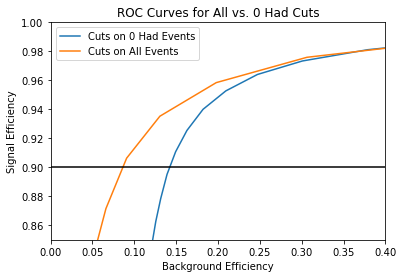

In [57]:
plt.plot(background_efficiencies, signal_efficiencies, label='Cuts on 0 Had Events')
plt.plot(tot_background_efficiencies, tot_signal_efficiencies, label='Cuts on All Events')
#plt.plot(weighted_background_efficiencies, weighted_signal_efficiencies)
plt.plot([0, 1], [0.9, 0.9], color='k')
plt.title('ROC Curves for All vs. 0 Had Cuts')
plt.xlabel('Background Efficiency')
plt.ylabel('Signal Efficiency')
plt.xlim([0, 0.4])
plt.ylim([0.85, 1])
plt.legend(loc='upper left')
#plt.show()
plt.savefig('../plots/trainingUpdate/temp/CutsOnAllvs0Had.pdf')

In [56]:
#for i, j in zip(weighted_signal_efficiencies, weighted_background_efficiencies):
#    print(i, j)

print(weighted_signal_efficiencies)

NameError: name 'weighted_signal_efficiencies' is not defined

In [32]:
em_cut = -10
had_cut = 1

signal_criteria = (signal_frame['EMEt'] > em_cut) | (signal_frame['HadEt'] > had_cut)
background_criteria = (background_frame['EMEt'] > em_cut) | (background_frame['HadEt'] > had_cut)

signal_frame_cut = signal_frame.loc[signal_criteria].copy()
background_frame_cut = background_frame.loc[background_criteria].copy()

print(len(signal_frame_cut) / len(signal_frame))
print(len(background_frame_cut) / len(background_frame))

# Overall signal efficiency whose background efficiency we are working to minimize
target_eff = 0.9
# Signal efficiency after cutting on EM Et and Had Et, cutting out a square in Et space hence box
box_cut_eff = len(signal_frame_cut) / len(signal_frame)
# Signal efficiency we must tune with ROC curve to achieve target efficiency given box cut
roc_eff = target_eff / box_cut_eff 

In [38]:
print(roc_eff)

0.9


In [46]:
weights = [0.1 * i for i in range(101)]
           
efficiencies = manual_train_1d(signal_frame, background_frame, ['EMEt', 'HadEt'], weights, .9)

min_eff, min_weight = min_manual_eff_1d(efficiencies, weights)

print(min_eff)
print(min_weight)

0.133513881446509
5.9


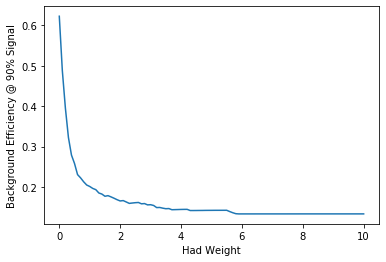

In [53]:
plt.plot(weights, efficiencies)
plt.xlabel('Had Weight')
plt.ylabel('Background Efficiency @ 90% Signal')
plt.show()

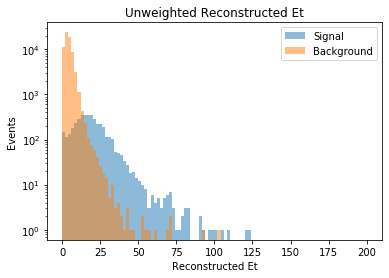

In [46]:
plt.hist(signal_frame['TotalEt'], 100, (0,200), log=True, alpha=0.5, label='Signal')
plt.hist(background_frame['TotalEt'], 100, (0, 200), alpha=0.5, label='Background')
plt.title('Unweighted Reconstructed Et')
plt.xlabel('Reconstructed Et')
plt.ylabel('Events')
plt.legend(loc='upper right')
plt.show()

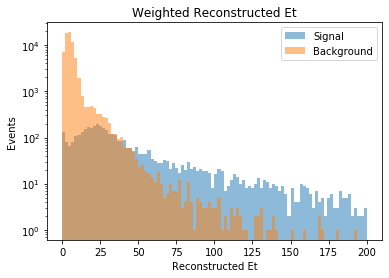

In [45]:
plt.hist(signal_frame['3LayerWeightedEt'], 100, (0,200), log=True, alpha=0.5, label='Signal')
plt.hist(background_frame['3LayerWeightedEt'], 100, (0, 200), alpha=0.5, label='Background')
plt.title('Weighted Reconstructed Et')
plt.xlabel('Reconstructed Et')
plt.ylabel('Events')
plt.legend(loc='upper right')
plt.show()

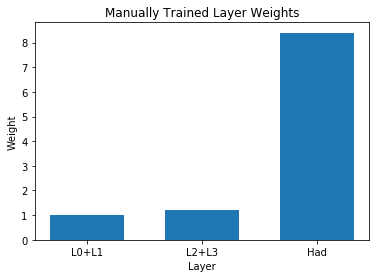

In [12]:
values = [1, 1.2, 8.4]
p1 = plt.bar(range(3), values, .65)
plt.xticks(range(3), ('L0+L1', 'L2+L3', 'Had'))
plt.xlabel('Layer')
plt.ylabel('Weight')
plt.title('Manually Trained Layer Weights')
plt.show()

In [ ]:
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))